In [1]:
import sys
sys.path.append('..')

In [2]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import *
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error
from spinesTS.pipeline import Pipeline

In [4]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------------------------------+
|    | ds name              | columns                                                              |
+----+----------------------+----------------------------------------------------------------------+
|  0 | AirPassengers        | Month, #Passengers                                                   |
|  1 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  2 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  3 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  4 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  5 | Electric_Production  | date, value                                                          |
|  6 | M3_monthly_FTS       | series_id, method_id, forecast, horizon, timestamp, origin_ti

In [5]:
cs = series_data['Electric_Production']

x_train, x_test, y_train, y_test = split_series(cs['value'], cs['value'], 128, 24, train_size=0.9)

In [6]:
x_train.shape, x_test.shape

((221, 128), (25, 128))

# StackingRNN

r2: 0.8815599957896516
mae: 2.3768844808349607
mape: 0.022801455647807733


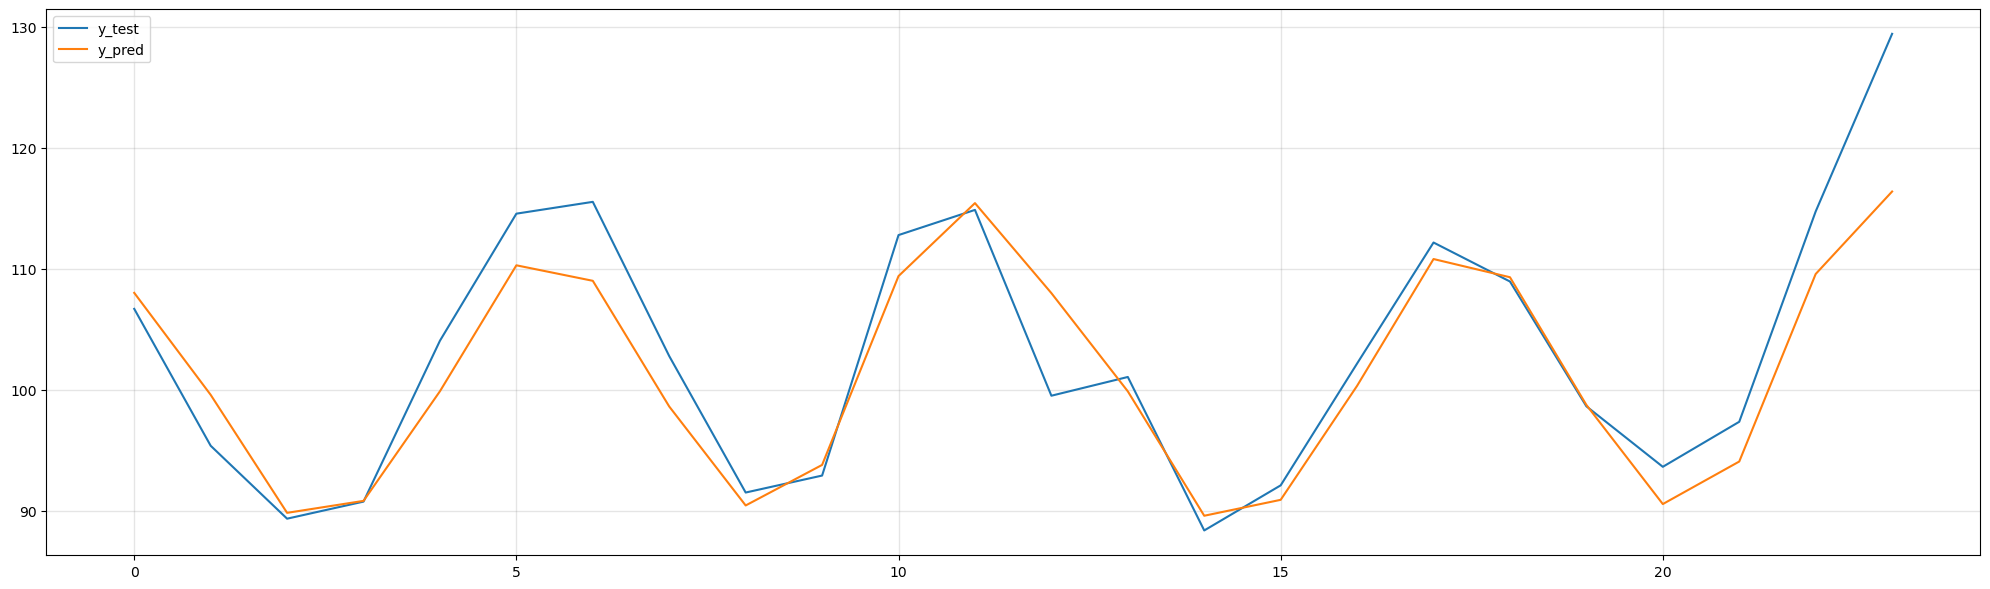

In [8]:
model = StackingRNN(128, 24, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1, diff_n=1, 
                    stack_num=2, bidirectional=True, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=False, lr_scheduler=None)
y_pred_inverse = model.predict(x_test)
# y_pred_inverse = sc_y.inverse_transform(y_pred)
print(f"r2: {r2_score(y_test.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test, y_pred_inverse)}")
a = plot2d(y_test, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# GAUNet

r2: 0.8131608437201783
mae: 3.1362042364095046
mape: 0.030510286224155747


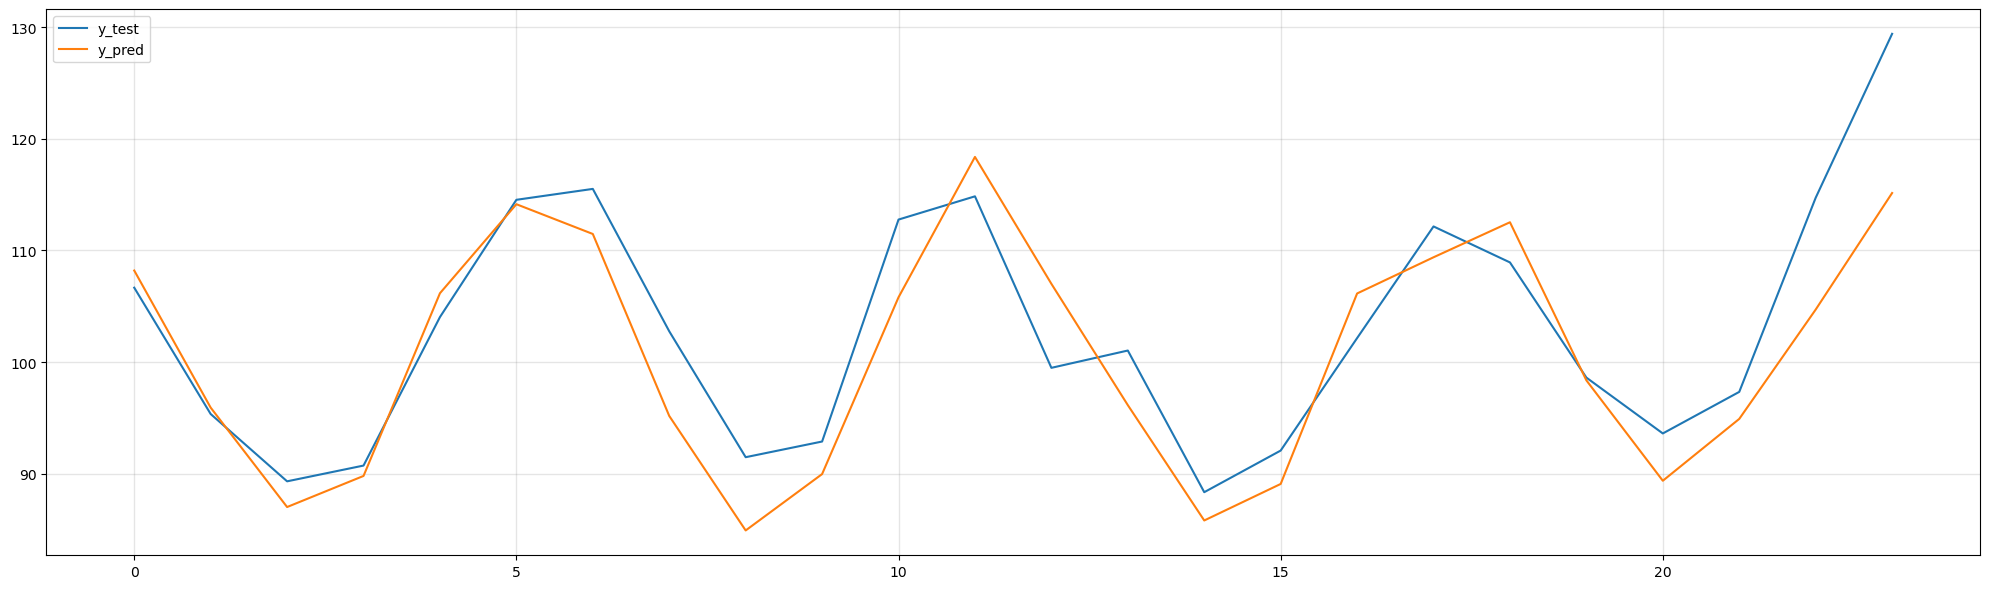

In [8]:
model = GAUNet(128, 24, random_seed=42, flip_features=False, learning_rate=0.001, level=1, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=False, lr_scheduler=None)
y_pred_inverse = model.predict(x_test)
print(f"r2: {r2_score(y_test.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test, y_pred_inverse)}")
a = plot2d(y_test, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# Time2VecNet

r2: 0.8372770385948494
mae: 2.786961499898275
mape: 0.02698903244076549


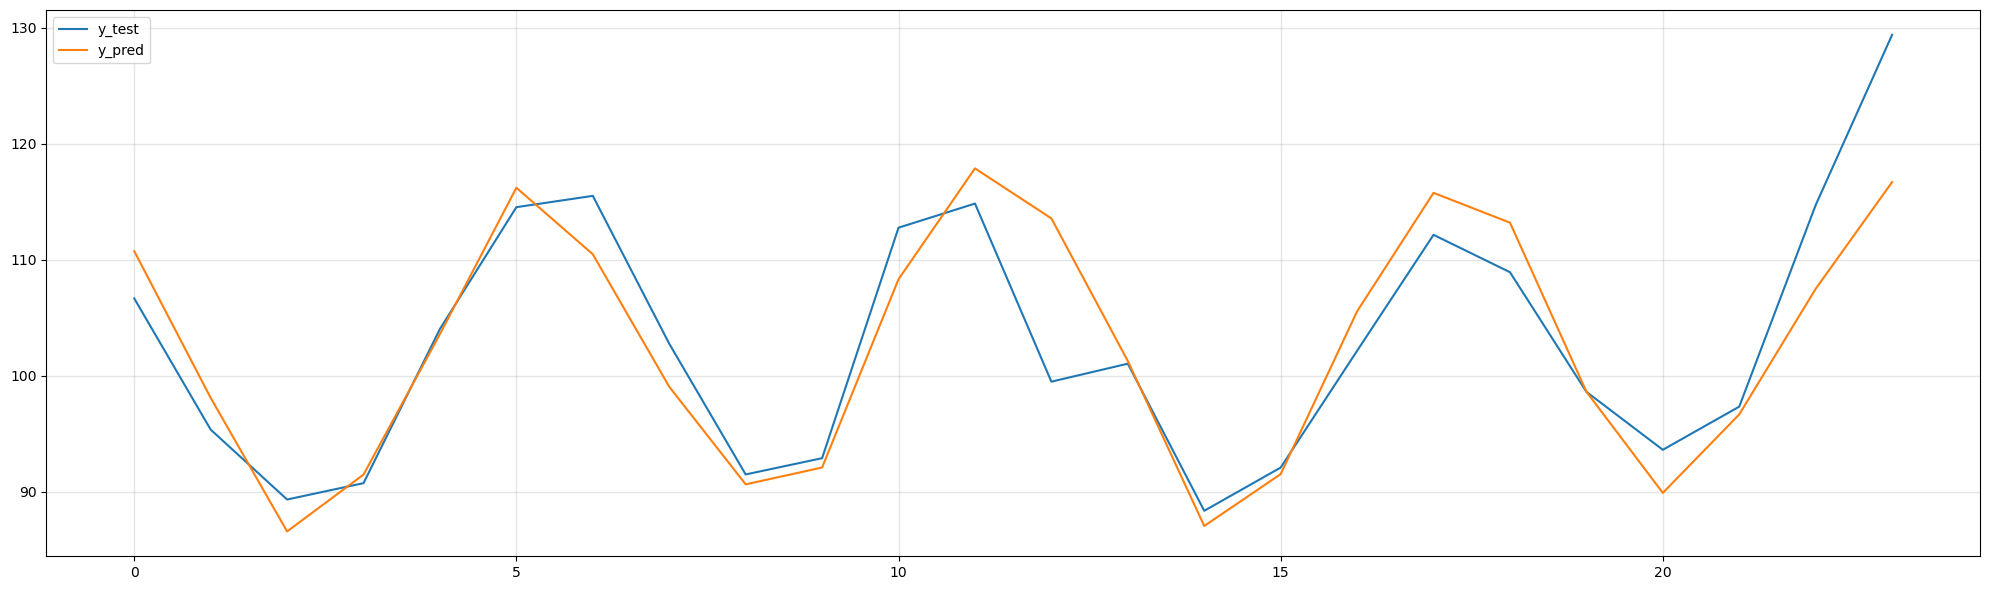

In [9]:
model = Time2VecNet(128, 24, random_seed=42, flip_features=False, learning_rate=0.001, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=False, lr_scheduler='ReduceLROnPlateau')

y_pred_inverse = model.predict(x_test)

print(f"r2: {r2_score(y_test.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test, y_pred_inverse)}")
a = plot2d(y_test, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))